In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [4]:
import sys
sys.path.append('C:\\Users\\a1882\\Desktop\\EEG\\eegdata_3000\\train')
sys.path.append('C:\\Users\\a1882\\Desktop\\EEG\\eegdata_3000\\validation')
sys.path.append('C:\\Users\\a1882\\Desktop\\EEG\\eegdata_3000\\slice_data')
sys.path

['C:\\Program Files\\JetBrains\\PyCharm 2022.3.3\\plugins\\python\\helpers-pro\\jupyter_debug',
 'C:\\Program Files\\JetBrains\\PyCharm 2022.3.3\\plugins\\python\\helpers\\pydev',
 'C:\\Users\\a1882\\Desktop\\EEG',
 'C:\\Users\\a1882\\Desktop\\EEG',
 'C:\\Users\\a1882\\anaconda3\\python310.zip',
 'C:\\Users\\a1882\\anaconda3\\DLLs',
 'C:\\Users\\a1882\\anaconda3\\lib',
 'C:\\Users\\a1882\\anaconda3',
 '',
 'C:\\Users\\a1882\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages',
 'C:\\Users\\a1882\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\win32',
 'C:\\Users\\a1882\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\win32\\lib',
 'C:\\Users\\a1882\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\loc

In [3]:
file_list = os.listdir('C:/Users/a1882/Desktop/EEG/eegdata/raw')
saved_path = os.getcwd()
print("Current Working Directory is " + saved_path)
os.chdir(r"C:\Users\a1882\Desktop\EEG\eegdata\raw")
for file_name in file_list:
    print(file_name)
    data = pd.read_csv(os.path.join(r"C:\Users\a1882\Desktop\EEG\eegdata\raw",file_name))
    print(data.shape)
os.chdir(saved_path)

Current Working Directory is C:\Users\a1882\Desktop\EEG
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv
(32, 15567)
lefthand_zyy_05_epocflex_2023.03.22t16.50.54+08.00.md.bp.csv
(32, 15530)
read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv
(32, 15343)
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv
(32, 46225)
read_bke_03_epocflex_2023.03.22t16.04.38+08.00.md.bp.csv
(32, 14961)
read_bke_04_epocflex_2023.03.22t16.07.02+08.00.md.bp.csv
(32, 15611)
read_bke_05_epocflex_2023.03.22t16.09.28+08.00.md.bp.csv
(32, 15699)
rest_cp_epocflex_2023.03.26t14.28.21+08.00.md.bp.csv
(32, 16023)
rest_cp_epocflex_2023.03.26t14.30.40+08.00.md.bp.csv
(32, 15479)
rest_cp_epocflex_2023.03.26t14.32.55+08.00.md.bp.csv
(32, 15966)
rest_zyy_01_epocflex_179733_2023.03.18t09.39.31+08.00.md.bp.csv
(32, 16299)
rest_zyy_02_epocflex_179733_2023.03.18t09.43.21+08.00.md.bp.csv
(32, 16443)
rest_zyy_04_epocflex_2023.03.22t16.41.16+08.00.md.bp.csv
(32, 15569)
rest_zyy_05_epocflex_2023.03.22t16.43

In [5]:
file_list = os.listdir('C:/Users/a1882/Desktop/EEG/eegdata/raw')
saved_path = os.getcwd()
print("Current Working Directory is " + saved_path)
os.chdir(r"C:\Users\a1882\Desktop\EEG\eegdata\raw")
# 定义要处理的CSV文件路径和新文件存放路径

input_folder = 'C:/Users/a1882/Desktop/EEG/eegdata/raw'
output_folder = 'C:/Users/a1882/Desktop/EEG/eegdata_3000/slice_data'

length = 3000

# 循环处理每个csv文件
for filename in os.listdir(input_folder):
    # 读取csv文件
    df = pd.read_csv(os.path.join(input_folder, filename), header=None)

    # 计算切片数量
    num_slices = df.shape[1] // length
    print(f'{filename} has {num_slices} parts.')

    # 切片并写入新文件
    for i in range(num_slices):
            start_index = i * 3000
            end_index = (i+1) * 3000
            slice_df = df.iloc[1:33,start_index:end_index].astype(np.float64)
            slice_df.to_csv(os.path.join(output_folder, f'{filename}_{i}.csv'), index=False)

os.chdir(saved_path)

Current Working Directory is C:\Users\a1882\Desktop\EEG
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv has 5 parts.
lefthand_zyy_05_epocflex_2023.03.22t16.50.54+08.00.md.bp.csv has 5 parts.
read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv has 5 parts.
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv has 15 parts.
read_bke_03_epocflex_2023.03.22t16.04.38+08.00.md.bp.csv has 4 parts.
read_bke_04_epocflex_2023.03.22t16.07.02+08.00.md.bp.csv has 5 parts.
read_bke_05_epocflex_2023.03.22t16.09.28+08.00.md.bp.csv has 5 parts.
rest_cp_epocflex_2023.03.26t14.28.21+08.00.md.bp.csv has 5 parts.
rest_cp_epocflex_2023.03.26t14.30.40+08.00.md.bp.csv has 5 parts.
rest_cp_epocflex_2023.03.26t14.32.55+08.00.md.bp.csv has 5 parts.
rest_zyy_01_epocflex_179733_2023.03.18t09.39.31+08.00.md.bp.csv has 5 parts.
rest_zyy_02_epocflex_179733_2023.03.18t09.43.21+08.00.md.bp.csv has 5 parts.
rest_zyy_04_epocflex_2023.03.22t16.41.16+08.00.md.bp.csv has 5 parts.
rest_zyy_05_epocflex_20

In [6]:
import os
import random
import pandas as pd
import random
import shutil
file_list = os.listdir('C:/Users/a1882/Desktop/EEG/eegdata_3000/slice_data')
# 设置训练集和验证集的比例
train_ratio = 0.7
valid_ratio = 0.3

# 定义CSV文件所在的目录和训练集、验证集的目录
csv_dir = 'C:\\Users\\a1882\\Desktop\\EEG\\eegdata_3000\\slice_data'
train_dir = 'C:\\Users\\a1882\\Desktop\\EEG\\eegdata_3000\\train'
valid_dir = 'C:\\Users\\a1882\\Desktop\\EEG\\eegdata_3000\\validation'

num_files = len([f for f in os.listdir(csv_dir) if os.path.isfile(os.path.join(csv_dir, f))])
# 获取所有的CSV文件
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

    # 计算训练集和验证集的数据量
train_size = int(train_ratio * num_files)
valid_size = int(valid_ratio * num_files)


# 随机抽取文件并将其复制到训练集或验证集中
for file in file_list:
    if random.uniform(0, 1) < train_ratio and train_size > 0:
        shutil.copy(os.path.join(csv_dir, file), os.path.join(train_dir, file))
        train_size -= 1
    elif valid_size > 0:
        shutil.copy(os.path.join(csv_dir, file), os.path.join(valid_dir, file))
        valid_size -= 1
    else:
        break

print(train_size)
print(valid_size)

0
0


In [9]:
train_file_list = os.listdir('C:/Users/a1882/Desktop/EEG/eegdata_3000/train')
saved_path = os.getcwd()
print("Current Working Directory is " + saved_path)
os.chdir(r"C:\Users\a1882\Desktop\EEG\eegdata_3000\train")
for train_file_name in train_file_list:
    print(train_file_name)
os.chdir(saved_path)

Current Working Directory is C:\Users\a1882\Desktop\EEG
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_0.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_2.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_3.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_4.csv
lefthand_zyy_05_epocflex_2023.03.22t16.50.54+08.00.md.bp.csv_1.csv
lefthand_zyy_05_epocflex_2023.03.22t16.50.54+08.00.md.bp.csv_2.csv
read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_0.csv
read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_2.csv
read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_3.csv
read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_4.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_0.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_1.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_11.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_14.csv
read_bke_02_epocflex_2023.03.22t15.4

In [10]:
train_labels = []
for train_file_name in train_file_list:
    train_labels.append(train_file_name.split('_')[0])

print(train_labels)
print(train_labels[3])

label_map = {'lefthand': 0, 'read': 1, 'rest': 2, 'walkbase': 3, 'walkl': 4 ,'walkfocus': 5}

encode_labels  = [label_map[train_label] for train_label in train_labels]

train_label = torch.tensor(encode_labels, dtype=torch.int64)

['lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus

In [11]:
valid_file_list = os.listdir('C:/Users/a1882/Desktop/EEG/eegdata_3000/validation')
saved_path = os.getcwd()
print("Current Working Directory is " + saved_path)
os.chdir(r"C:\Users\a1882\Desktop\EEG\eegdata_3000\validation")
for valid_file_name in valid_file_list:
    print(valid_file_name)
os.chdir(saved_path)

Current Working Directory is C:\Users\a1882\Desktop\EEG
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_1.csv
lefthand_zyy_05_epocflex_2023.03.22t16.50.54+08.00.md.bp.csv_0.csv
lefthand_zyy_05_epocflex_2023.03.22t16.50.54+08.00.md.bp.csv_3.csv
lefthand_zyy_05_epocflex_2023.03.22t16.50.54+08.00.md.bp.csv_4.csv
read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_1.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_10.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_12.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_13.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_3.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_5.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_6.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_8.csv
read_bke_03_epocflex_2023.03.22t16.04.38+08.00.md.bp.csv_1.csv
read_bke_04_epocflex_2023.03.22t16.07.02+08.00.md.bp.csv_2.csv
read_bke_04_epocflex_2023.03.22t16.07.02+08

In [12]:
valid_labels = []
for valid_file_name in valid_file_list:
    valid_labels.append(valid_file_name.split('_')[0])

print(valid_labels)
print(valid_labels[3])

label_map = {'lefthand': 0, 'read': 1, 'rest': 2, 'walkbase': 3, 'walkl': 4 ,'walkfocus': 5}

encode_labels  = [label_map[valid_label] for valid_label in valid_labels]

valid_label = torch.tensor(encode_labels, dtype=torch.int64)

['lefthand', 'lefthand', 'lefthand', 'lefthand', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl']
lefthand


In [14]:
train_unique_objects = set(train_labels)
train_class_number = len(train_unique_objects)
print(train_class_number)

valid_unique_objects = set(valid_labels)
valid_class_number = len(valid_unique_objects)
print(valid_class_number)

6
6


In [15]:
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class EEGDataset(Dataset):
    def __init__(self, filelist, root_dir,data_label,transform=None):
        self.filelist = filelist
        self.root_dir = root_dir
        self.data_label = data_label
        self.transform = transform


    def __len__(self):
        return len(self.filelist)

    def __getitem__(self, index):
        #print('index:', index, 'len(self.filelist):', len(self.filelist), 'len(self.data_label):', len(self.data_label))
        data_label = self.data_label[index]
        file_path = os.path.join(self.root_dir, self.filelist[index])
        eeg_data = np.array(pd.read_csv(file_path))
        return eeg_data, data_label

In [18]:
class EEGNet(nn.Module):
    def __init__(self, num_classes=train_class_number):
        super(EEGNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=(1, 4), stride=(1, 2))
        self.bn1 = nn.BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.pool1 = nn.MaxPool2d(kernel_size=(1, 4), stride=(1, 4))
        self.dropout1 = nn.Dropout(p=0.25)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=(1, 2), stride=(1, 2))
        self.bn2 = nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.pool2 = nn.MaxPool2d(kernel_size=(1, 4), stride=(1, 4))
        self.dropout2 = nn.Dropout(p=0.25)
        self.fc1 = nn.Linear(47104, 128)
        self.dropout3 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = torch.unsqueeze(x, 1)
        #print('x:', x.shape)
        x = self.conv1(x)
        #print('conv1:', x.shape)
        x = self.bn1(x)
        x = torch.relu(x)
        x = self.pool1(x)
        x = self.dropout1(x)
        x = self.conv2(x)
        #print('conv2:', x.shape)
        x = self.bn2(x)
        x = torch.relu(x)
        x = self.pool2(x)
        x = self.dropout2(x)
        x = x.view(x.size(0), -1)
        #print('flatten:', x.shape)
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.dropout3(x)
        x = self.fc2(x)
        return x
# model = EEGNet()

In [19]:
X = torch.randn(size=( 1, 32, 3000), dtype=torch.float32)
model = EEGNet()
output = model(X)
print(output.shape)

torch.Size([1, 6])


In [20]:
train_dataset = EEGDataset(train_file_list, 'C:/Users/a1882/Desktop/EEG/eegdata_3000/train', train_label)
valid_dataset = EEGDataset(valid_file_list, 'C:/Users/a1882/Desktop/EEG/eegdata_3000/validation', valid_label)

In [27]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=True)

In [28]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [29]:
learning_rate = 0.0001
batch_size = 64
num_epochs = 100
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [30]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # Compute prediction error
        pred = model(X.float())
        loss = loss_fn(pred, y)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            global train_loss
            train_loss.append(loss)



def test(dataloader, model,loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X.float())
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error:\n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    global valid_loss
    valid_loss.append(test_loss)
    global accuracy
    accuracy.append(correct)

In [31]:
# torch.cuda.empty_cache()
# model = model = EEG_LSTM(input_size=31000, hidden_size=128, num_layers=2,num_classes=train_class_number).to(device)
train_loss = []
valid_loss = []
accuracy = []
for t in range(num_epochs):
    print(f"Epoch {t + 1}\n-------------------------------")
    model.train(True)
    train(train_loader, model, loss_fn, optimizer)

    model.train(False)
    test(valid_loader, model, loss_fn)

print("Done!")

Epoch 1
-------------------------------
loss: 1.770838  [    0/  161]
Test Error:
 Accuracy: 33.3%, Avg loss: 1.246245 

Epoch 2
-------------------------------
loss: 2.317134  [    0/  161]
Test Error:
 Accuracy: 69.6%, Avg loss: 1.319230 

Epoch 3
-------------------------------
loss: 1.359992  [    0/  161]
Test Error:
 Accuracy: 63.8%, Avg loss: 1.284133 

Epoch 4
-------------------------------
loss: 1.158272  [    0/  161]
Test Error:
 Accuracy: 65.2%, Avg loss: 1.173290 

Epoch 5
-------------------------------
loss: 0.982226  [    0/  161]
Test Error:
 Accuracy: 62.3%, Avg loss: 1.310692 

Epoch 6
-------------------------------
loss: 0.739225  [    0/  161]
Test Error:
 Accuracy: 69.6%, Avg loss: 0.765032 

Epoch 7
-------------------------------
loss: 0.858606  [    0/  161]
Test Error:
 Accuracy: 73.9%, Avg loss: 0.867459 

Epoch 8
-------------------------------
loss: 0.756355  [    0/  161]
Test Error:
 Accuracy: 71.0%, Avg loss: 0.813509 

Epoch 9
------------------------

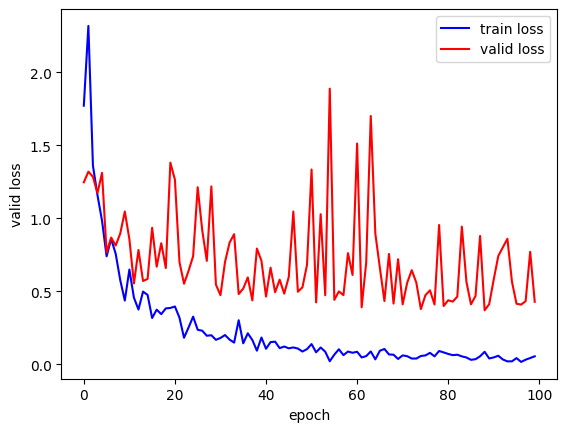

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure()
plt.plot(train_loss,'b',label='train loss')
plt.ylabel('train loss')
plt.xlabel('epoch')
plt.plot(valid_loss,'r',label='valid loss')
plt.ylabel('valid loss')
plt.xlabel('epoch')
plt.legend()

#plt.save(os.path.join('C:/User/a1882/Desktop/EEG','loss.png'))
plt.show()

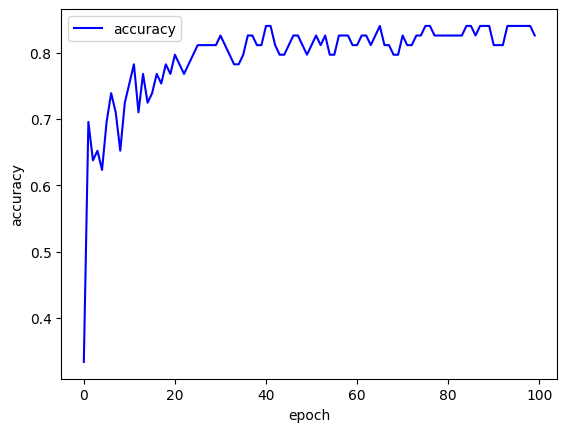

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure()
plt.plot(accuracy, 'b', label='accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
#plt.save(os.path.join('C:/User/a1882/Desktop/EEG','loss.png'))
plt.show()